In [2]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data
dataset = load_dataset("husainaliarif/Covid19")
df = dataset["train"].to_pandas()

In [3]:
df_GR = df[(df["continent"] == "Europe") & (df["location"] == "Greece")].copy()
df_GR["date"] = pd.to_datetime(df_GR["date"])
df_GR = df_GR.sort_values(by="date")
df_GR["7d_cases"] = df_GR["new_cases"].rolling(7).mean()
df_7d = df_GR[["date", "7d_cases"]]
df_7d = df_7d.set_index("date").dropna()
test_set = df_7d.tail(30)
training_test = df_7d.iloc[:-30]

In [4]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


training_data = training_test["7d_cases"]

In [5]:
model = ExponentialSmoothing(
    training_data,   # our data
    trend="add",  # linear trend
    seasonal=None    # no seasonality
)

fitted_model = model.fit()
forecast = fitted_model.forecast(30)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


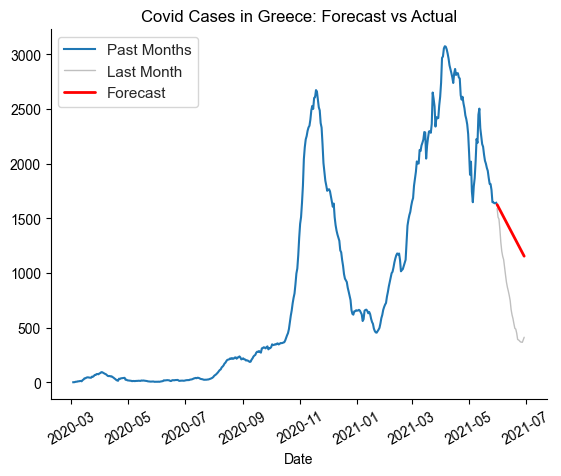

In [6]:
sns.lineplot(data=training_test, x="date", y="7d_cases", label="Past Months")
sns.despine()
sns.set_theme(style="ticks")
plt.xlabel("Date")
plt.ylabel("")
plt.xticks(rotation=30)
plt.plot(test_set.index, test_set["7d_cases"], color="grey", linewidth=1, alpha=0.5, label="Last Month")
plt.plot(forecast.index, forecast, color="red", linewidth=2, label="Forecast")
plt.legend()
plt.title("Covid Cases in Greece: Forecast vs Actual")
plt.show()


In [12]:
difference = test_set["7d_cases"] - forecast
mean_diff = difference.mean()
mean_diff = abs(mean_diff)

sqr_diff = difference**2
mean_sqr = abs(sqr_diff.mean())

In [9]:
percent_diff = difference / test_set["7d_cases"]
percent_diff = percent_diff*100
percent_diff = abs(percent_diff.mean())
percent_diff

np.float64(112.09364081883555)

In [18]:
results = {
    "Mean Absolute Error": mean_diff,
    "Mean Squared Error": mean_sqr,
    "Mean Percentage Error": percent_diff
}

metrics_table = pd.DataFrame.from_dict(results, orient="index", columns=["Values"])
metrics_table

,Values
Mean Absolute Error,595.323690
Mean Squared Error,420366.624536
Mean Percentage Error,112.093641


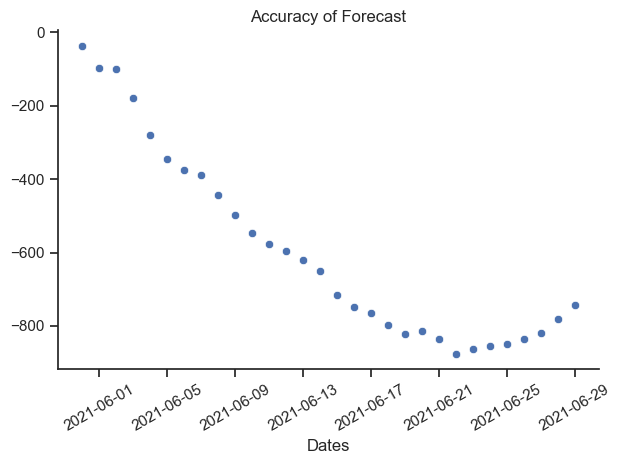

In [38]:
sns.scatterplot( x=test_set.index, y=difference)
sns.despine()
sns.set_theme(style="ticks")
plt.xlabel("Dates")
plt.ylabel("")
plt.title("Accuracy of Forecast")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()